In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [4]:
#De data binnenhalen
train = pd.read_csv('Airlinesatisfaction.csv')

In [5]:
# Drop unnecessary columns
new_train = train.drop('Unnamed: 0', axis=1)
new_train = train.drop('id', axis=1)

new_train.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [135]:
#Random steekproef van 100
# random_subset = new_train.sample(n=100) 
random_subset = new_train
random_subset.head(5)

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [136]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
random_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [137]:
#Vervang codering voor cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
random_subset.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [138]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [139]:
random_subset['Age'].value_counts()

39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64

In [140]:
random_subset['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [141]:
#Mooiere output
rp.summary_cont(random_subset['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,103904.0,39.3797,15.115,0.0469,39.2878,39.4716


In [142]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [143]:
rp.summary_cont(random_subset['Flight_Distance'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,103904.0,1189.4484,997.1473,3.0935,1183.3853,1195.5115


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_9744\931596904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Flight Distance Distribution')

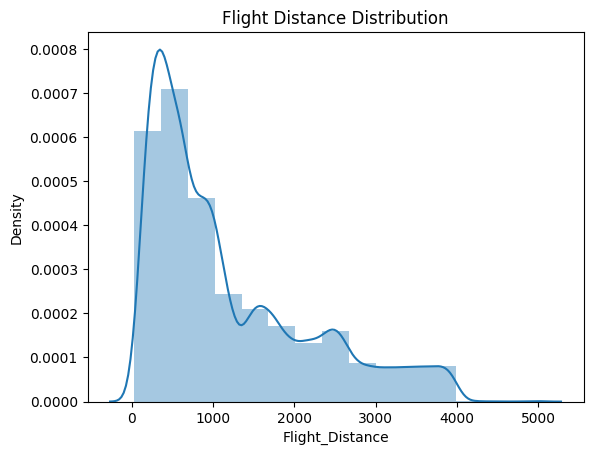

In [144]:
#Visuele checks van de verdelingen
x = random_subset['Flight_Distance']
sns.distplot(x, bins = 15)
plt.title('Flight Distance Distribution')


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_9744\3321396133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Age')

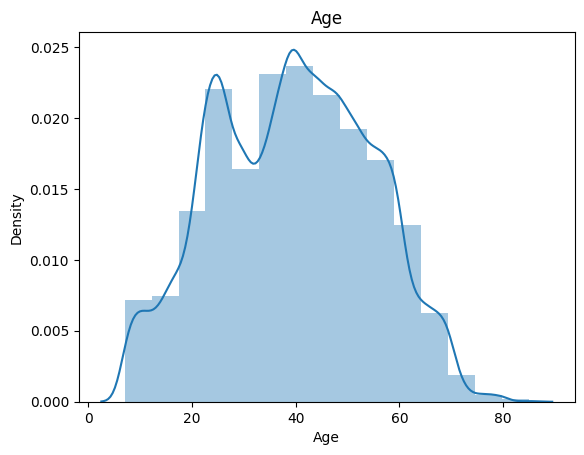

In [145]:
x = random_subset['Age']
sns.distplot(x, bins = 15)
plt.title('Age')


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_9744\2432483861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Departure Delay in Minutes')

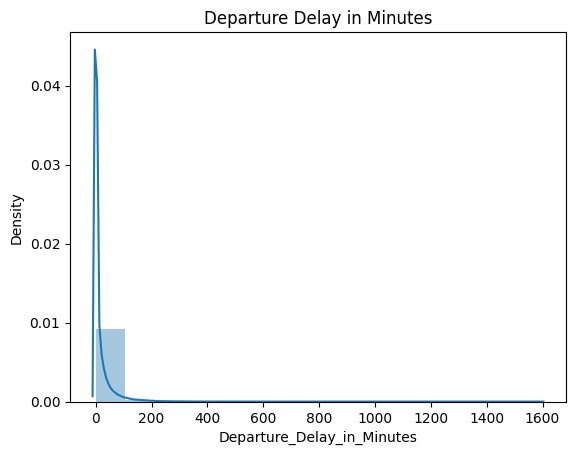

In [146]:
x = random_subset['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure Delay in Minutes')

C:\Users\Aghoo\AppData\Local\Temp\ipykernel_9744\403260203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

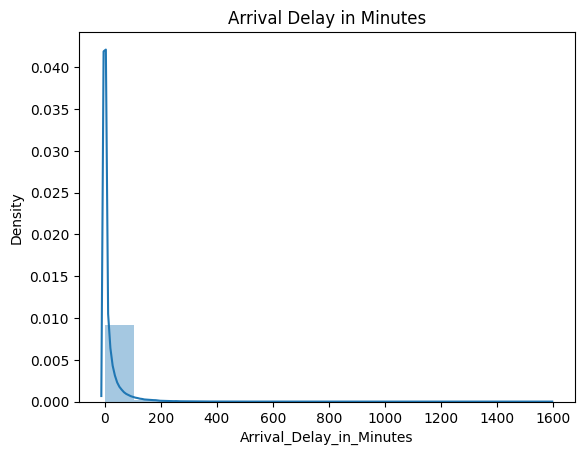

In [147]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

In [148]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Flight_Distance'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Departure_Delay_in_Minutes'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Arrival_Delay_in_Minutes'],
    ascending=True,
    inplace=True)

In [149]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
random_subset['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
random_subset['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
random_subset['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
random_subset['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

In [150]:
#Eindelijk is het zover
random_subset[0:5]

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
87735,87735,0,0,28,1,1,843,1,1,1,...,4,5,3,3,3,2,4,0,0.0,0
26829,26829,0,1,39,0,1,311,4,4,4,...,1,3,2,4,4,5,1,0,0.0,1
1185,1185,1,1,46,1,3,255,0,0,0,...,3,3,2,2,5,3,4,0,0.0,1
21650,21650,1,0,36,1,3,311,3,3,3,...,4,5,5,5,5,4,4,0,0.0,0
56369,56369,0,1,35,0,1,311,3,5,5,...,1,4,4,5,5,4,1,0,0.0,0


In [151]:
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
df_z[0:5]

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.193002,-1.015031,-2.115208,-0.752880,0.670865,-1.067767,-0.347441,-1.302646,-1.350954,-1.255895,...,0.481508,1.255590,-0.266840,-0.535045,-0.240472,-1.395328,0.543829,-0.387532,-0.392229,-0.874473
1,-0.837570,-1.015031,0.472767,-0.025121,-1.490614,-1.067767,-0.880966,0.956691,0.616172,0.888612,...,-1.769081,-0.296785,-1.026951,0.311769,0.549799,1.156436,-1.742292,-0.387532,-0.392229,1.143545
2,-1.692527,0.985192,0.472767,0.437998,0.670865,1.009393,-0.937126,-2.055758,-2.006662,-1.970731,...,-0.268688,-0.296785,-1.026951,-1.381858,1.340069,-0.544740,0.543829,-0.387532,-0.392229,1.143545
3,-1.010235,0.985192,-2.115208,-0.223601,0.670865,1.009393,-0.880966,0.203579,-0.039537,0.173776,...,0.481508,1.255590,1.253380,1.158582,1.340069,0.305848,0.543829,-0.387532,-0.392229,-0.874473
4,0.147277,-1.015031,0.472767,-0.289761,-1.490614,-1.067767,-0.880966,0.203579,1.271880,1.603448,...,-1.769081,0.479403,0.493270,1.158582,1.340069,0.305848,-1.742292,-0.387532,-0.392229,-0.874473


#### Check of de data normaal verdeeld is met Shapiro-Wilk

In [152]:
#Je kan dit voor elke feature doen.
test = stats.shapiro(df_z['Age'])

print(test.pvalue)

0.0


C:\Users\Aghoo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Check of de data normaal verdeeld is met Kolmogorov Smirnov

In [153]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)

KstestResult(statistic=0.05432050316156101, pvalue=6.44377185311423e-267, statistic_location=-0.8190403951004728, statistic_sign=1)

In [154]:
stats.kstest(df_z['Flight_Distance'], stats.norm.cdf)


KstestResult(statistic=0.15776052342288605, pvalue=0.0, statistic_location=-0.11377348519272189, statistic_sign=1)

In [155]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.34918127531862, pvalue=0.0, statistic_location=-0.3875317957960077, statistic_sign=-1)

In [156]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)

In [157]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed:_0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
Gender,103904.0,0.507459,0.499947,0.0,0.00,1.0,1.00,1.0
Customer_Type,103904.0,0.817322,0.386404,0.0,1.00,1.0,1.00,1.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Type_of_Travel,103904.0,0.689627,0.462649,0.0,0.00,1.0,1.00,1.0
Class,103904.0,2.028103,0.962858,1.0,1.00,2.0,3.00,3.0
Flight_Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0


#### Plot histogrammen

array([[<AxesSubplot: title={'center': 'Departure_Delay_in_Minutes'}>]],
      dtype=object)

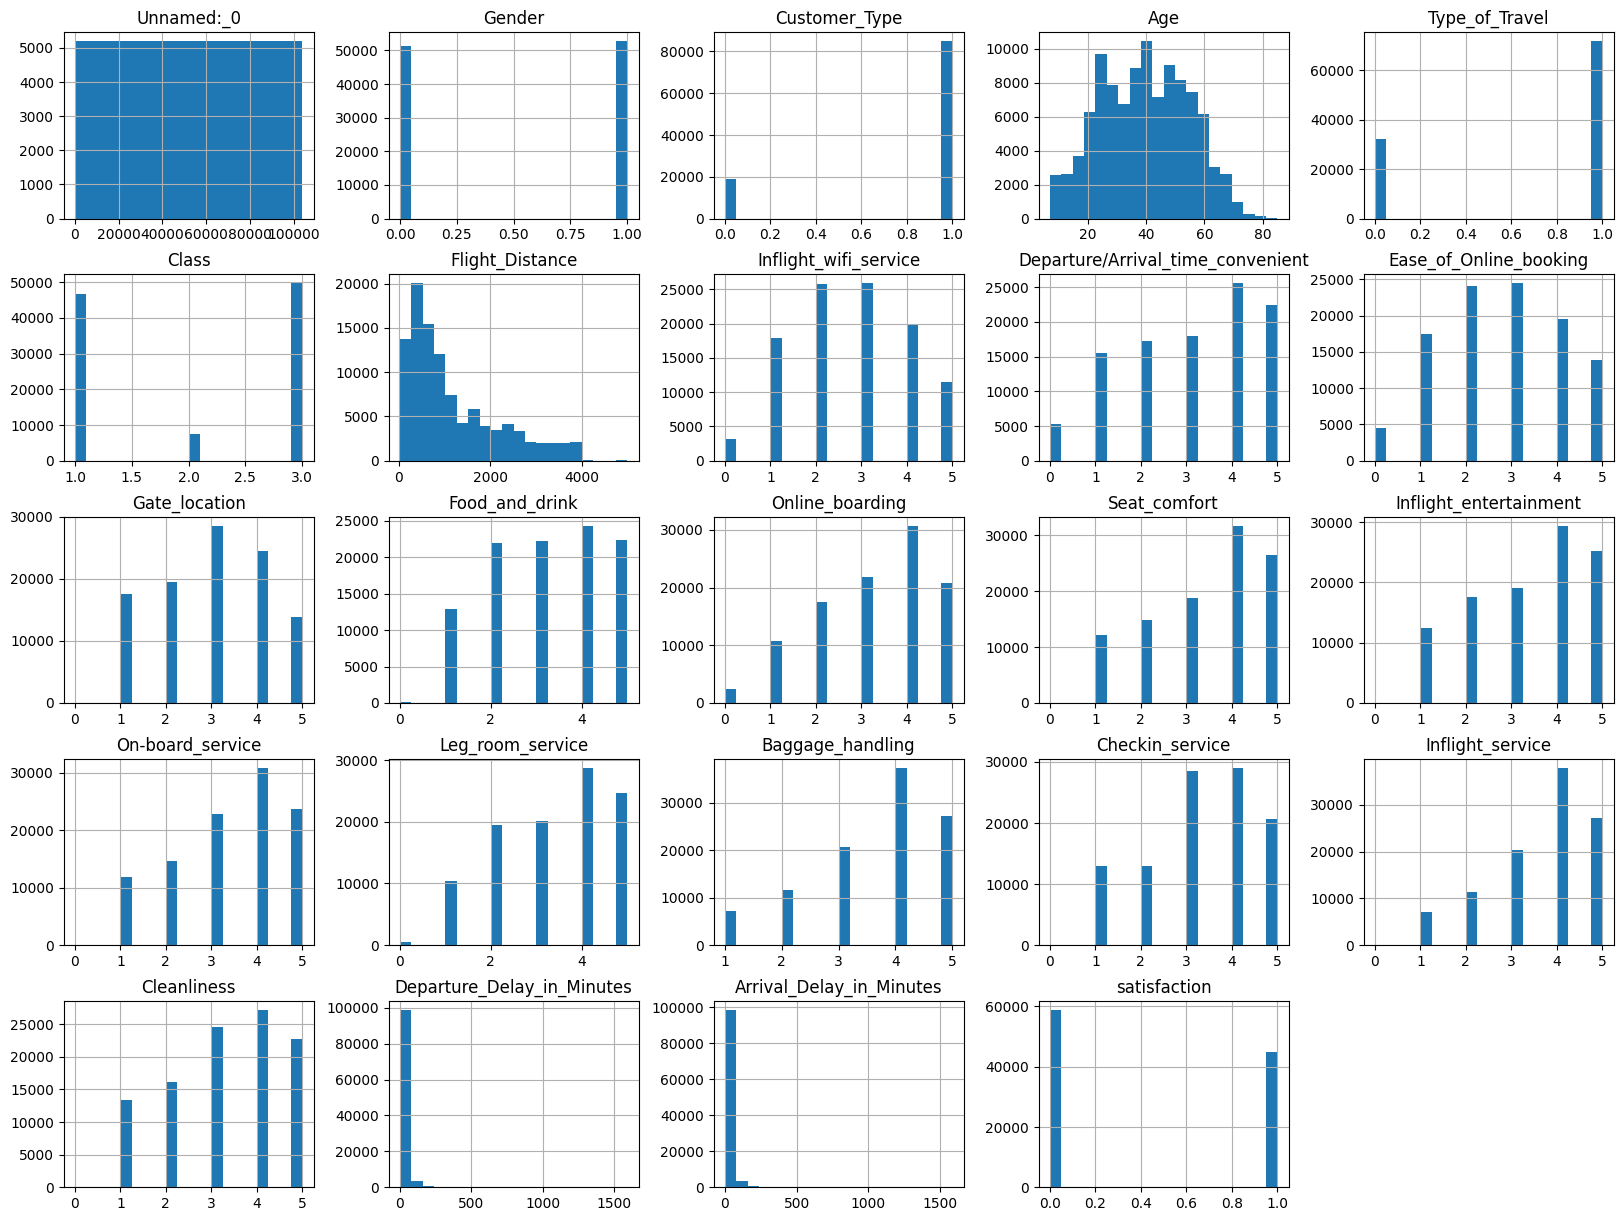

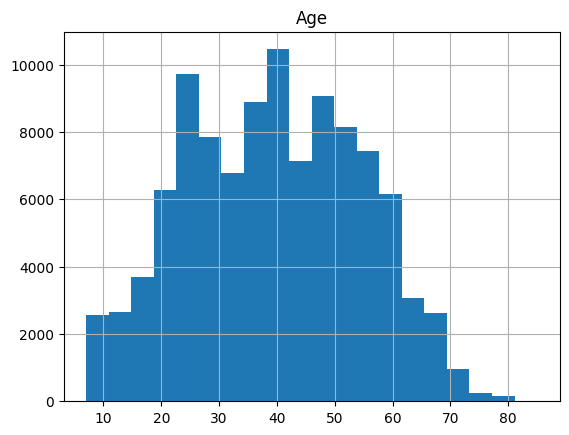

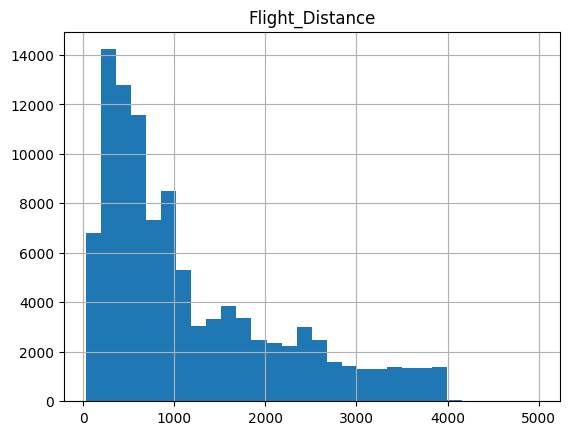

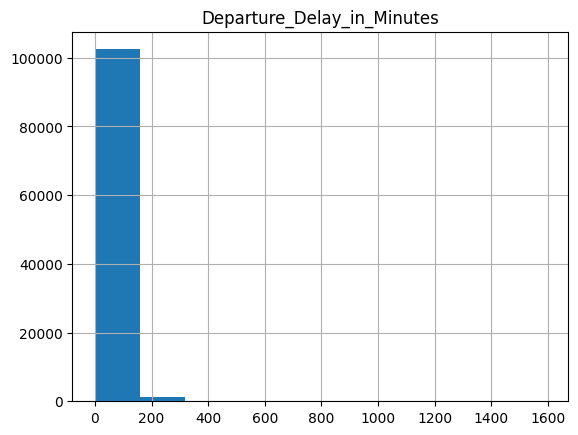

In [158]:
# Als je alle data tegelijk wil plotten:
random_subset.hist(bins = 20, figsize = (20,15))
# Als je maar 1 variabele wil plotten
random_subset.hist(column = "Age", bins = 20)
random_subset.hist(column = "Flight_Distance", bins = 30)
random_subset.hist(column = "Departure_Delay_in_Minutes", bins = 10)

<AxesSubplot: xlabel='Age'>

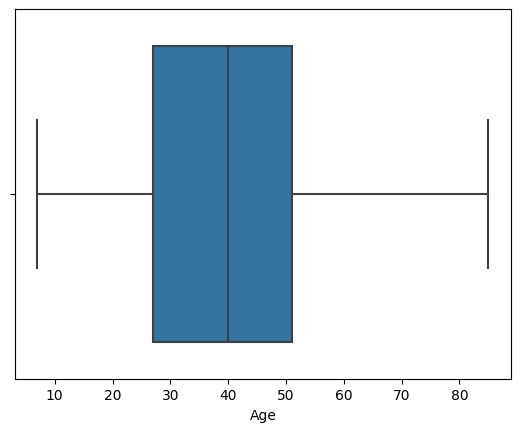

In [159]:
import seaborn as sns
sns.boxplot(x=random_subset['Age'])

<AxesSubplot: xlabel='Flight_Distance'>

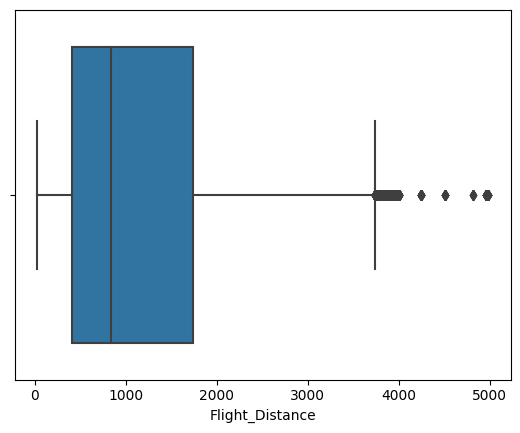

In [160]:
sns.boxplot(x=random_subset['Flight_Distance'])

<AxesSubplot: xlabel='Departure_Delay_in_Minutes'>

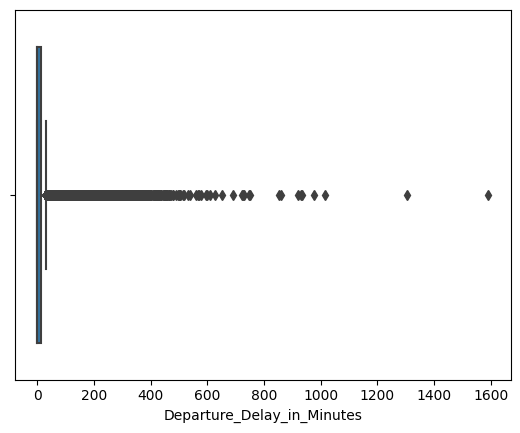

In [161]:
sns.boxplot(x=random_subset['Departure_Delay_in_Minutes'])

<AxesSubplot: xlabel='Arrival_Delay_in_Minutes'>

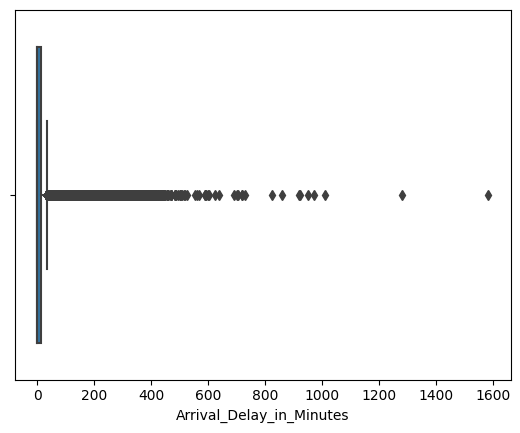

In [162]:
sns.boxplot(x=random_subset['Arrival_Delay_in_Minutes'])

#### Maak heatmap en scatter matrix

In [163]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

<AxesSubplot: >

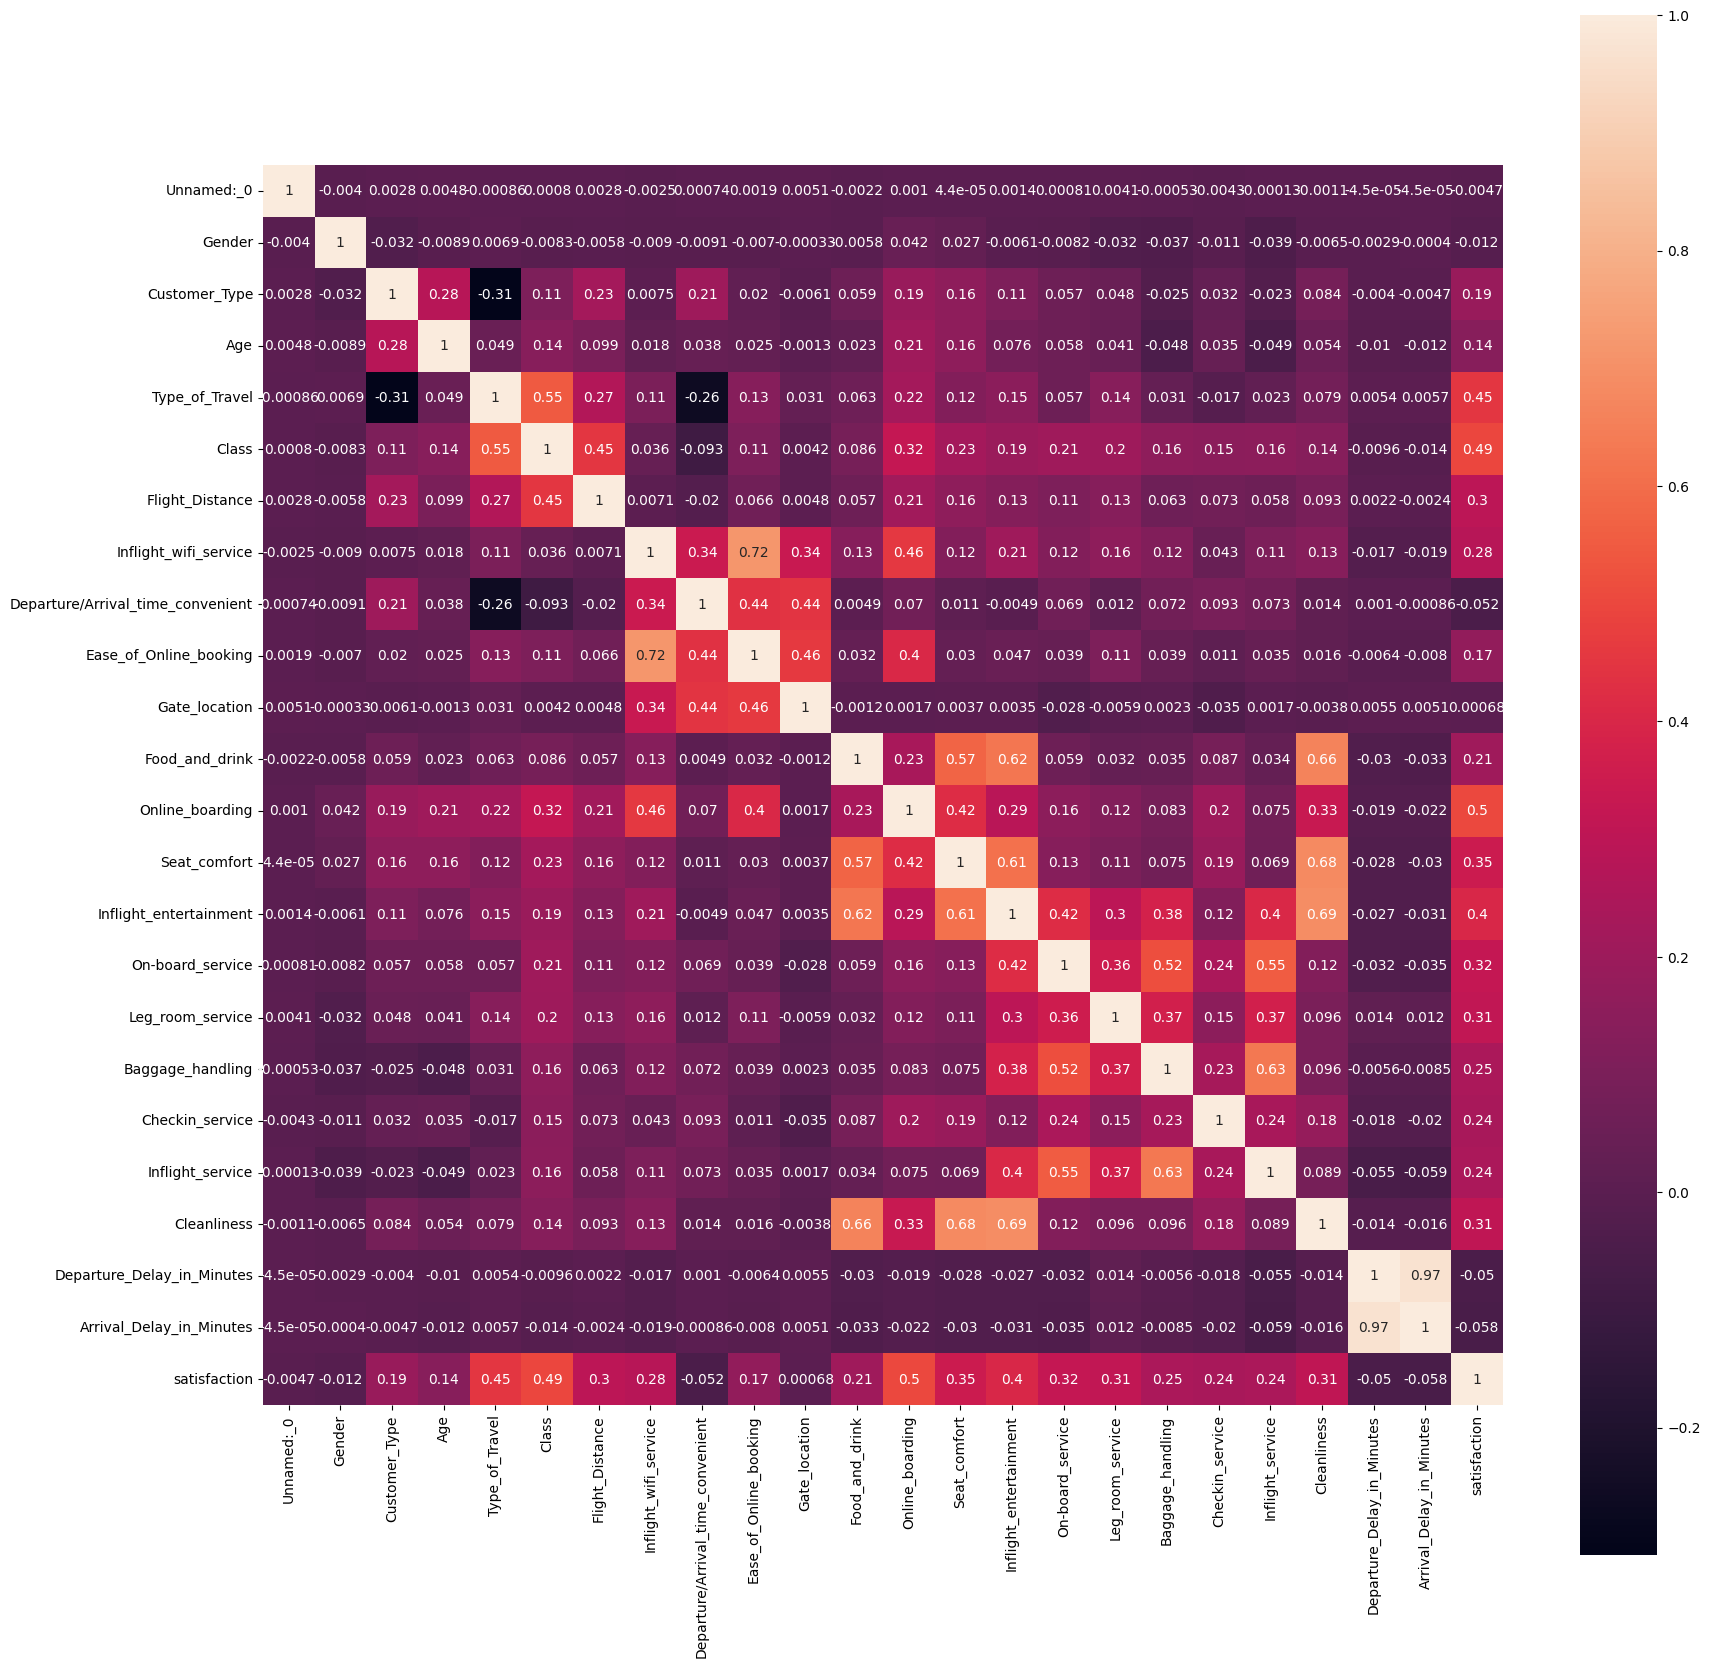

In [164]:
# Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(random_subset.corr(), annot = True, square = True)

<AxesSubplot: >

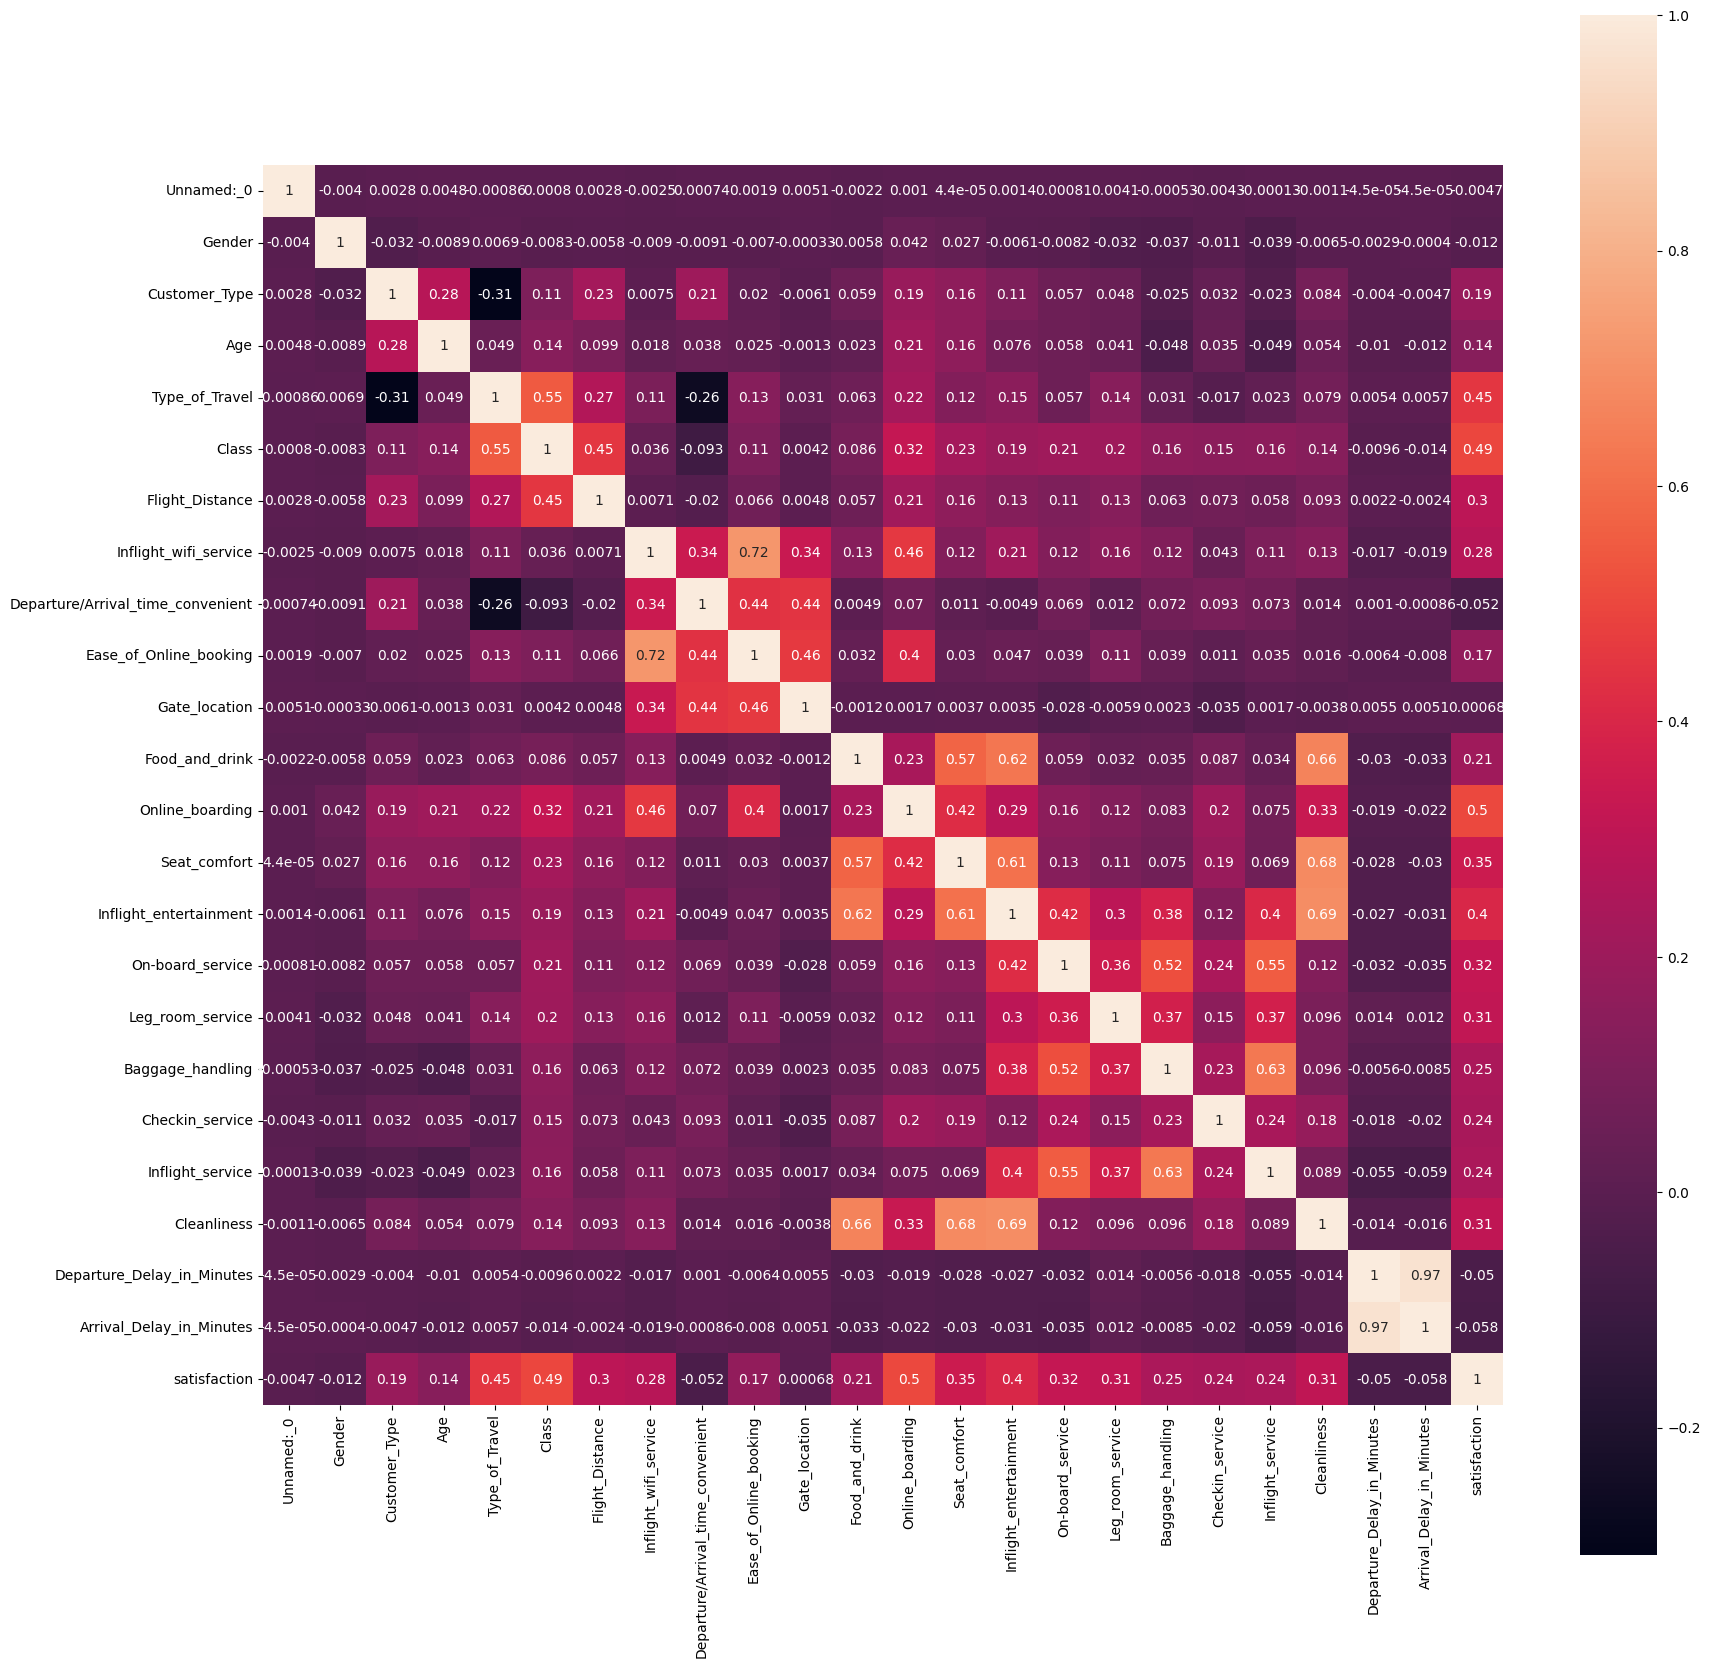

In [165]:
#Nu met z scores
# Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(df_z.corr(), annot = True, square = True)

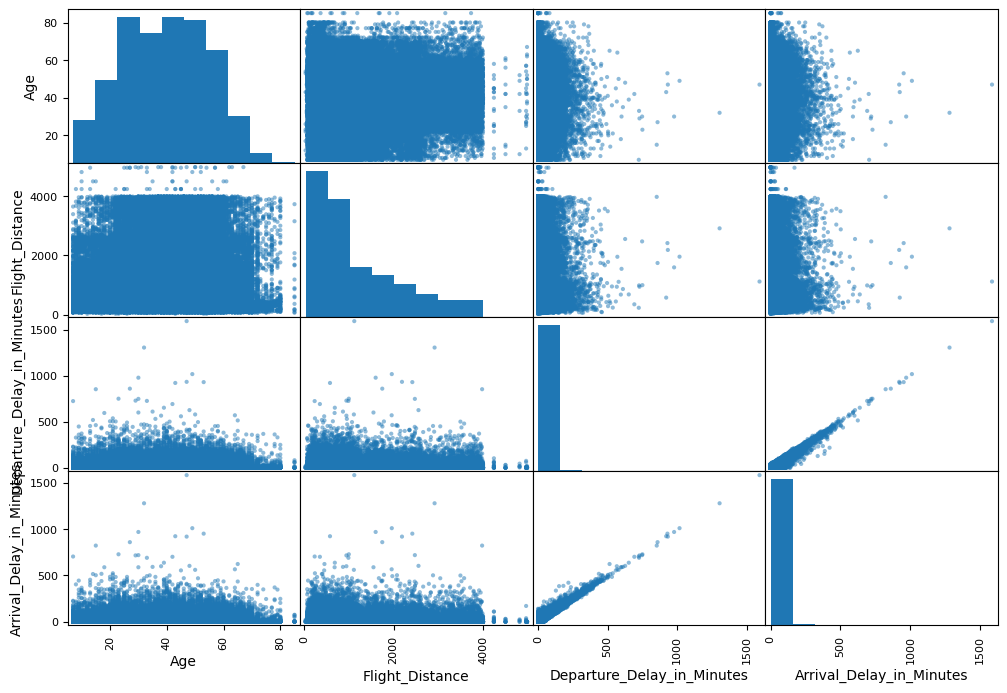

In [168]:
# Scatter matrix
attributes = ["Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
scatter_matrix(random_subset[attributes], figsize = (12, 8))
plt.show()

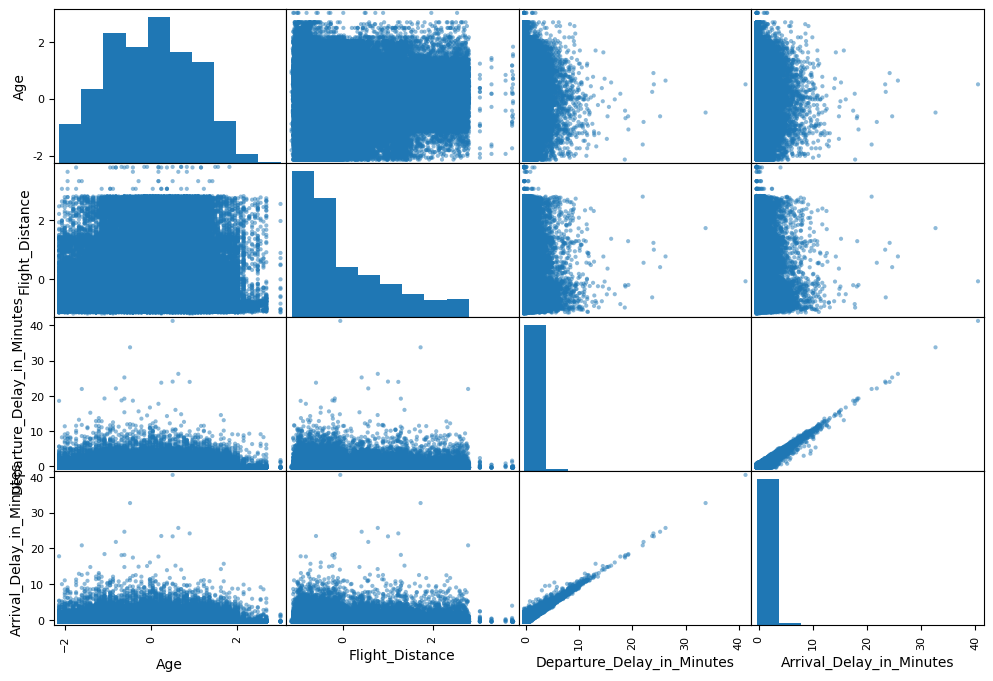

In [169]:
#Nu met de z scores
# Scatter matrix
attributes = ["Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
scatter_matrix(df_z[attributes], figsize = (12, 8))
plt.show()

In [170]:
# Correlatie
corr_matrix = random_subset.corr()
print(corr_matrix["Arrival_Delay_in_Minutes"]) # Voor de correlatie met 1 variabele

Unnamed:_0                          -0.000045
Gender                              -0.000396
Customer_Type                       -0.004747
Age                                 -0.012147
Type_of_Travel                       0.005683
Class                               -0.013674
Flight_Distance                     -0.002426
Inflight_wifi_service               -0.019095
Departure/Arrival_time_convenient   -0.000864
Ease_of_Online_booking              -0.007984
Gate_location                        0.005143
Food_and_drink                      -0.032524
Online_boarding                     -0.021949
Seat_comfort                        -0.029900
Inflight_entertainment              -0.030703
On-board_service                    -0.035227
Leg_room_service                     0.011843
Baggage_handling                    -0.008542
Checkin_service                     -0.020369
Inflight_service                    -0.059196
Cleanliness                         -0.015774
Departure_Delay_in_Minutes        

In [171]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,1.000000,-0.003978,0.002844,0.004786,-0.000856,0.000798,0.002794,-0.002490,0.000739,0.001913,...,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045,-0.004731
Gender,-0.003978,1.000000,-0.031732,-0.008928,0.006909,-0.008253,-0.005828,-0.008974,-0.009142,-0.006951,...,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.000396,-0.012211
Customer_Type,0.002844,-0.031732,1.000000,0.281674,-0.308333,0.105735,0.225200,0.007543,0.206869,0.019509,...,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,-0.004747,0.187638
Age,0.004786,-0.008928,0.281674,1.000000,0.048524,0.140565,0.099461,0.017859,0.038125,0.024842,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147,0.137167
Type_of_Travel,-0.000856,0.006909,-0.308333,0.048524,1.000000,0.545257,0.267344,0.105085,-0.259763,0.133511,...,0.148199,0.056543,0.138803,0.031321,-0.016751,0.022599,0.079207,0.005432,0.005683,0.449000
Class,0.000798,-0.008253,0.105735,0.140565,0.545257,1.000000,0.451211,0.036279,-0.092788,0.106391,...,0.194366,0.209505,0.204964,0.160460,0.151613,0.156353,0.135818,-0.009637,-0.013674,0.494471
Flight_Distance,0.002794,-0.005828,0.225200,0.099461,0.267344,0.451211,1.000000,0.007131,-0.020043,0.065717,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,0.298780
Inflight_wifi_service,-0.002490,-0.008974,0.007543,0.017859,0.105085,0.036279,0.007131,1.000000,0.343845,0.715856,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,0.284245
Departure/Arrival_time_convenient,0.000739,-0.009142,0.206869,0.038125,-0.259763,-0.092788,-0.020043,0.343845,1.000000,0.436961,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.051601
Ease_of_Online_booking,0.001913,-0.006951,0.019509,0.024842,0.133511,0.106391,0.065717,0.715856,0.436961,1.000000,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984,0.171705


In [172]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=-0.010152230154219996, pvalue=0.0010658979338295583)

In [173]:
#Tijd voor meer overzicht
import pingouin as pg

In [174]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr() # alleen de kolommen met meer dan 50% niet-null waardes worden meegenomen.

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,-,,,,,,,,,,...,,,,,,,,,,
Gender,-0.004,-,***,**,*,**,,**,**,*,...,*,**,***,***,***,***,*,,,***
Customer_Type,0.003,-0.032,-,***,***,***,***,*,***,***,...,***,***,***,***,***,***,***,,,***
Age,0.005,-0.009,0.282,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,**,***,***
Type_of_Travel,-0.001,0.007,-0.308,0.049,-,***,***,***,***,***,...,***,***,***,***,***,***,***,,,***
Class,0.001,-0.008,0.106,0.141,0.545,-,***,***,***,***,...,***,***,***,***,***,***,***,**,***,***
Flight_Distance,0.003,-0.006,0.225,0.099,0.267,0.451,-,*,***,***,...,***,***,***,***,***,***,***,,,***
Inflight_wifi_service,-0.002,-0.009,0.008,0.018,0.105,0.036,0.007,-,***,***,...,***,***,***,***,***,***,***,***,***,***
Departure/Arrival_time_convenient,0.001,-0.009,0.207,0.038,-0.26,-0.093,-0.02,0.344,-,***,...,,***,***,***,***,***,***,,,***
Ease_of_Online_booking,0.002,-0.007,0.02,0.025,0.134,0.106,0.066,0.716,0.437,-,...,***,***,***,***,***,***,***,*,*,***


In [175]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Customer_Type,Class,Cleanliness,Departure_Delay_in_Minutes
Unnamed:_0,-,0.2,0.359,0.797,0.719,0.989
Gender,-0.004,-,0.000,0.008,0.036,0.344
Customer_Type,0.003,-0.032,-,0.000,0.000,0.193
Class,0.001,-0.008,0.106,-,0.,0.002
Cleanliness,-0.001,-0.007,0.084,0.136,-,0.000
Departure_Delay_in_Minutes,-0.0,-0.003,-0.004,-0.01,-0.014,-


In [176]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service
Unnamed:_0,-,0.2,0.368,0.422,0.812,0.537,0.102,0.486,0.747,0.989,0.660,0.793,0.192,0.865,0.164,0.966
Gender,-0.004,-,0.060,0.004,0.003,0.025,0.915,0.063,0.000,0.000,0.049,0.009,0.000,0.000,0.001,0.000
Flight_Distance,0.003,-0.006,-,0.022,0.000,0.000,0.122,0.000,0.,0.,0.,0.000,0.,0.000,0.000,0.000
Inflight_wifi_service,-0.002,-0.009,0.007,-,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.000,0.000
Departure/Arrival_time_convenient,0.001,-0.009,-0.02,0.344,-,0.,0.,0.114,0.000,0.000,0.117,0.000,0.000,0.000,0.000,0.000
Ease_of_Online_booking,0.002,-0.007,0.066,0.716,0.437,-,0.,0.000,0.,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Gate_location,0.005,-0.0,0.005,0.336,0.445,0.459,-,0.709,0.586,0.237,0.257,0.000,0.058,0.456,0.000,0.588
Food_and_drink,-0.002,-0.006,0.057,0.135,0.005,0.032,-0.001,-,0.,0.,0.,0.000,0.000,0.000,0.000,0.000
Online_boarding,0.001,0.042,0.215,0.457,0.07,0.404,0.002,0.234,-,0.,0.,0.,0.,0.000,0.,0.000
Seat_comfort,0.0,0.027,0.157,0.123,0.011,0.03,0.004,0.575,0.42,-,0.,0.,0.000,0.000,0.,0.000


In [177]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.000,0.001,0.000
Flight_Distance,0.099,-,0.487,0.435
Departure_Delay_in_Minutes,-0.01,0.002,-,0.
Arrival_Delay_in_Minutes,-0.012,-0.002,0.965,-


#### Maak een regressiemodel met Arrival Delay  als y (target value) en Flight Distance als x (feature matrix). Opnieuw Arrival Delay als afhankelijke variabel (target value) maar nu met behulp van Age en Departure Delay.


In [178]:
#De variabele Arrival Delay heeft missing values; die moeten er eerst uit
random_subset.dropna(inplace=True)

In [179]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,15.290630,0.187126,81.713157,0.000000,0.000006,-0.000004,14.923866,15.657393
1,Flight_Distance,-0.000094,0.000121,-0.780767,0.434941,0.000006,-0.000004,-0.000330,0.000142


In [180]:
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes','Age']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.11,0.09,11.88,0.00,0.93,0.93,0.92,1.29
1,Flight_Distance,-0.00,0.00,-5.01,0.00,0.93,0.93,-0.00,-0.00
2,Departure_Delay_in_Minutes,0.98,0.00,1193.11,0.00,0.93,0.93,0.98,0.98
3,Age,-0.00,0.00,-2.39,0.02,0.93,0.93,-0.01,-0.00


In [181]:
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.92,0.05,18.31,0.0,0.93,0.93,0.82,1.02
1,Flight_Distance,-0.00,0.00,-5.27,0.0,0.93,0.93,-0.00,-0.00
2,Departure_Delay_in_Minutes,0.98,0.00,1193.17,0.0,0.93,0.93,0.98,0.98


In [184]:
lm = pg.linear_regression(random_subset[['Departure_Delay_in_Minutes','Age']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.959472,0.088360,10.858686,0.00000,0.932159,0.932158,0.786288,1.132656
1,Departure_Delay_in_Minutes,0.980197,0.000822,1192.957861,0.00000,0.932159,0.932158,0.978587,0.981808
2,Age,-0.006010,0.002072,-2.900237,0.00373,0.932159,0.932158,-0.010072,-0.001948


In [185]:
#Nu met de z scores, dan zijn de coefficienten te vergelijken en onafhankelijk van de meeteenheid
df_z.dropna(inplace=True)
lm = pg.linear_regression(df_z[['Departure_Delay_in_Minutes','Age']], df_z['Arrival_Delay_in_Minutes'])
lm.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.001714,0.000809,2.118450,0.034139,0.932159,0.932158,0.000128,0.003301
1,Departure_Delay_in_Minutes,0.968349,0.000812,1192.957861,0.000000,0.932159,0.932158,0.966758,0.969940
2,Age,-0.002347,0.000809,-2.900237,0.003730,0.932159,0.932158,-0.003934,-0.000761


In [186]:
#Nu met de z scores, dan zijn de coefficienten te vergelijken en onafhankelijk van de meeteenheid
df_z.dropna(inplace=True)
lm = pg.linear_regression(df_z[['Flight_Distance', 'Departure_Delay_in_Minutes','Age']], df_z['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.00,0.0,2.12,0.03,0.93,0.93,0.00,0.00
1,Flight_Distance,-0.00,0.0,-5.01,0.00,0.93,0.93,-0.01,-0.00
2,Departure_Delay_in_Minutes,0.97,0.0,1193.11,0.00,0.93,0.93,0.97,0.97
3,Age,-0.00,0.0,-2.39,0.02,0.93,0.93,-0.00,-0.00


<AxesSubplot: xlabel='Departure_Delay_in_Minutes', ylabel='Arrival_Delay_in_Minutes'>

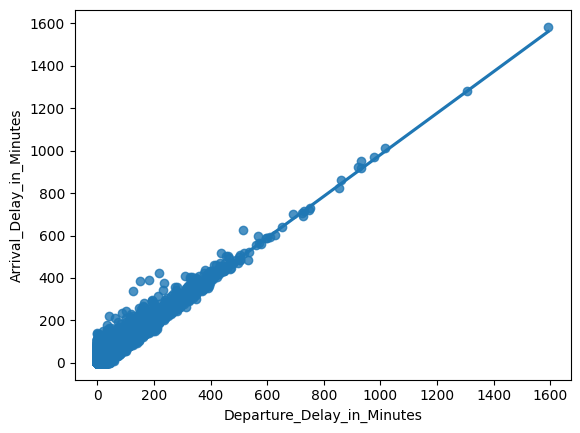

In [187]:
sns.regplot(x="Departure_Delay_in_Minutes", y="Arrival_Delay_in_Minutes", data=random_subset)